Navaneeth Krishnan 
28-09-22

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('Data.csv')
print(dataset)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [5]:
X = dataset.iloc[:, :-1].values
print(X,"\n")
y = dataset.iloc[:, 3].values
print(y)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]] 

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder_x= LabelEncoder()
X[:, 0]= label_encoder_x.fit_transform(X[:, 0])
print(X)

[[0 44.0 72000.0]
 [2 27.0 48000.0]
 [1 30.0 54000.0]
 [2 38.0 61000.0]
 [1 40.0 63777.77777777778]
 [0 35.0 58000.0]
 [2 38.77777777777778 52000.0]
 [0 48.0 79000.0]
 [1 50.0 83000.0]
 [0 37.0 67000.0]]


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 1 0 0 1 1 0 1 0 1]


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train,"\n")
print(X_test,"\n")
print(y_train,"\n")
print(y_test,"\n")

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]] 

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]] 

[0 1 0 0 1 1 0 1] 

[0 1] 



In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])
print(X_train,"\n")
print(X_test,"\n")

[[0.0 0.0 1.0 -0.1915918438457856 -1.0781259408412427]
 [0.0 1.0 0.0 -0.014117293757057902 -0.07013167641635401]
 [1.0 0.0 0.0 0.5667085065333239 0.6335624327104546]
 [0.0 0.0 1.0 -0.3045301939022488 -0.30786617274297895]
 [0.0 0.0 1.0 -1.901801144700799 -1.4204636155515822]
 [1.0 0.0 0.0 1.1475343068237056 1.2326533634535488]
 [0.0 1.0 0.0 1.4379472069688966 1.5749910381638883]
 [1.0 0.0 0.0 -0.7401495441200352 -0.5646194287757336]] 

[[0.0 1.0 0.0 -1.4661817944830127 -0.9069571034860731]
 [1.0 0.0 0.0 -0.44973664397484425 0.20564033932253029]] 



In [18]:
import numpy as np
import pandas as pd
!pip install scikit-learn

In [90]:
import pandas as pd
df = pd.read_csv('BreastCancer.csv')
df.shape
cols=df.columns
print(df)
df.value_counts('diagnosis')

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

diagnosis
B    357
M    212
dtype: int64

In [93]:
####Data Preprocessing
# Step 2.Separating the dependent and independent variable
y = df['diagnosis'] ##DEpendent variable
df.drop('diagnosis', axis = 1,inplace = True)
#Step 3. REmoving Unimportant features and features with most of the values are null
df.drop('Unnamed: 32', axis = 1,inplace=True)
df.drop('id', axis = 1,inplace=True)
cols=df.columns
print(cols)
x = df ##Independent Variables

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [92]:
df.describe() ###Finding spread and central tendency of data

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [30]:
##Step 5:Feature Scaling(MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
st_x= MinMaxScaler()
x_train= st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
print(x_train)

[[0.23044157 0.32157676 0.21940433 ... 0.31484671 0.30277942 0.09858323]
 [0.20062473 0.42116183 0.19452699 ... 0.06965208 0.34042973 0.06677161]
 [0.62232003 0.76929461 0.60403566 ... 0.56079917 0.19850187 0.07431457]
 ...
 [0.11619102 0.35726141 0.11077327 ... 0.17402687 0.17524147 0.17263545]
 [0.12963226 0.35311203 0.11706171 ... 0.         0.06780997 0.06919848]
 [0.21434995 0.59004149 0.21235575 ... 0.33251808 0.10782574 0.21172767]]


In [31]:
from sklearn.neighbors import KNeighborsClassifier
Classifier = KNeighborsClassifier(n_neighbors = 5)
Classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
y_pred = Classifier.predict(x_test)
print(y_pred)

['M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'M'
 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'M'
 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M'
 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M']


In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred,labels=Classifier.classes_)
print(cm)

[[79 11]
 [ 0 53]]


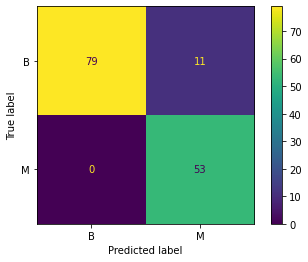

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = Classifier.classes_)
disp.plot()

In [48]:
##Classifier Accuracy
training_score = lassifier.score(x_train, y_train)
test_score = Classifier.score(x_test, y_test)
print(training_score)
print(test_score)

0.9765258215962441
0.9230769230769231


In [52]:
## Now we can try it with different values of k.
K = []
training = []
test = []
scores = {}
for k in range(2, 22):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
    training_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    K.append(k)
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
##Evaluating the model
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.9765258215962441, 0.9230769230769231]
3 : [0.9812206572769953, 0.8951048951048951]
4 : [0.9835680751173709, 0.916083916083916]
5 : [0.9765258215962441, 0.9230769230769231]
6 : [0.9788732394366197, 0.9090909090909091]
7 : [0.9788732394366197, 0.916083916083916]
8 : [0.9812206572769953, 0.951048951048951]
9 : [0.9765258215962441, 0.9230769230769231]
10 : [0.9741784037558685, 0.9370629370629371]
11 : [0.9765258215962441, 0.9230769230769231]
12 : [0.9694835680751174, 0.9300699300699301]
13 : [0.9741784037558685, 0.9300699300699301]
14 : [0.9694835680751174, 0.9370629370629371]
15 : [0.9694835680751174, 0.9370629370629371]
16 : [0.9647887323943662, 0.9440559440559441]
17 : [0.9694835680751174, 0.9370629370629371]
18 : [0.9671361502347418, 0.9440559440559441]
19 : [0.971830985915493, 0.9440559440559441]
20 : [0.9624413145539906, 0.9440559440559441]
21 : [0.9647887323943662, 0.9440559440559441]


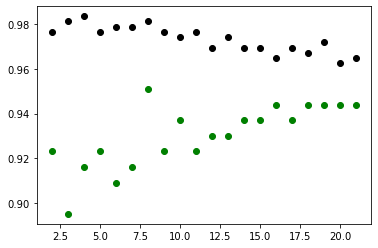

In [53]:
###Visualization
import matplotlib.pyplot as plt
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()